In [1]:
import time
import datetime
import math
import numpy as np
import pandas as pd

from owner_tools import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
import seaborn as sns #visualisation


# Sckit-learn
import sklearn
from sklearn.datasets import make_regression
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import make_column_transformer,TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,GradientBoostingRegressor,StackingRegressor
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Ridge,BayesianRidge
from sklearn.feature_selection import f_regression,chi2,RFE,VarianceThreshold,SelectKBest,SelectFromModel,SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler,scale,LabelEncoder,OneHotEncoder,MinMaxScaler,OrdinalEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV, cross_validate, cross_val_predict,ShuffleSplit,learning_curve
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,classification_report,make_scorer, mean_absolute_error,mean_squared_log_error,median_absolute_error,mean_absolute_percentage_error
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.utils.fixes import parse_version

# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# warnings ignore
# import warnings
# warnings.filterwarnings('ignore')

# scipy
import scipy
import pylab
from scipy import stats
from scipy.integrate import quad
from scipy.stats import pearsonr,skew,spearmanr

# Seaborn Settings
sns.set(color_codes=True)
sns.set_context('paper')
sns.set_theme(style="whitegrid")

# Plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot as plotly_plot, iplot as plotly_iplot
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly import tools
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from plotly import __version__ as plotly_version

print("Plotly - %s" % plotly_version)
print("Cufflinks - %s" % cf.__version__)

# Pandas settings
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.float_format', lambda x: '%.4f' % x)
# pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_info_columns = 120
# pd.reset_option('display.float_format')
# pd.set_option('precision', 4)
pd.set_option('display.max_columns', 250)

# IPython Modules
from IPython.core.display import display, HTML
from IPython.display import Image
display(HTML("<style>.container { width:100% !important; }</style>"))

Plotly - 4.14.3
Cufflinks - 0.17.3


# Settings

In [2]:
colors = sns.color_palette("tab10",100)
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.580392156

# Get Data

In [3]:
raw_data = pd.read_csv('data_standardized.csv')
raw_data.head()

ozellik_1  ozellik_3  ozellik_7  ozellik_9  ozellik_10  ozellik_12  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  ozellik_2_6GzIR  ozellik_2_9OstS  ozellik_2_D4bqt  ozellik_2_FkYUe  ozellik_2_I9dKW  ozellik_2_IFiiA  ozellik_2_IGKSa  ozellik_2_Jr8XU  ozellik_2_LYfnF  ozellik_2_Q9wcJ  ozellik_2_SBVsf  ozellik_2_TImQ6  ozellik_2_Usaqf  ozellik_2_VaN0e  ozellik_2_WRgtb  ozellik_2_XsdEI  ozellik_2_ZrgoT  ozellik_2_drAN8  ozellik_2_guoIE  ozellik_2_lJoht  ozellik_2_lyok6  ozellik_2_qRsh0  ozellik_2_umgch  ozellik_2_wvHao  ozellik_2_y7D7V  ozellik_4_1fXUU  ozellik_4_3CP9U  ozellik_4_7Ug6w  ozellik_4_8OwEC  ozellik_4_F7zIB  ozellik_4_FLa2T  ozellik_4_HmPi6  ozellik_4_IWXmd  ozellik_4_ZUQlq  ozellik_4_emFmb  ozellik_4_pPalV  ozellik_4_u8Pns  ozellik_5_2UKSU  ozellik_5_6raSi  ozellik_5_98zl9  ozellik_5_DW3HX  ozellik_5_EWrco  ozellik_5_I2lOx  ozellik_5_N6b0j  ozellik_5_QZcwf  ozellik_5_RrRnr  ozellik_5_UMk26  ozellik_5_VduPg  ozellik_5_jDjZ5  ozellik_5_jQ3qR  ozellik_5_nh9br  ozellik_5_oCnjB  ozellik_5_s79uM  ozellik_5_tzFZF  ozellik_6_2i4Sm  ozellik_6_3rxvK  ozellik_6_GHCGx  ozellik_6_NKJqq  ozellik_6_OrSI6  ozellik_6_P6Zds  ozellik_6_PeAML  ozellik_6_RAHNZ  ozellik_6_ah4hY  ozellik_6_bgvzF  ozellik_6_htY9G  ozellik_6_i7vnz  ozellik_6_oTeIN  ozellik_6_qqRqp  ozellik_6_tYBsQ  ozellik_8_2P147  ozellik_8_fwWAa  ozellik_13_80UEc  ozellik_13_9DWAo  ozellik_13_GotFh  ozellik_13_NIHt8  ozellik_13_NWKvg  ozellik_13_ThXWF  ozellik_13_U2vTd  ozellik_13_nMYpT  ozellik_13_t2DEk
0   -0.59251   -1.66111    0.39339   -1.18206    -1.77953     1.17417     0.62460     0.94159     0.76219  2.80955           3.31025      -4.99218         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         -0.39718          1.16274         -0.13618         -0.03804         -0.10825         -0.39034         -0.17532         -0.02709         -0.07971         -0.03862         -0.03639         -0.04127         -0.48902         -0.06590         24.38909         -1.73203         -0.03775         -0.03182         -0.04141         -0.00667         -0.03775          0.87923         -0.87888          -0.16074          -0.63107           2.44084          -0.06276          -0.05236          -0.16569          -0.17353          -0.16197          -0.03451
1    0.11895   -0.89064   -0.10350   -0.77542    -0.47004     0.45156     0.62460     1.29252     0.61170  0.87382           0.70029      -2.64169         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         

In [4]:
raw_data.describe().T

count     mean     std      min      25%      50%      75%       max
ozellik_1        89970.00000  0.00008 1.00006 -3.94656 -0.59251 -0.08432  0.62714   5.04839
ozellik_3        89970.00000  0.00037 0.99991 -1.66111 -0.89064 -0.12018  0.65028   3.73214
ozellik_7        89970.00000 -0.00004 1.00005 -2.09107 -0.60039 -0.10350  0.39339   9.03934
ozellik_9        89970.00000  0.00025 0.99998 -1.67907 -0.82061 -0.27842  0.76077   3.56207
ozellik_10       89970.00000  0.00033 0.99996 -1.77953 -0.76179 -0.07481  0.66305   5.85352
ozellik_12       89970.00000 -0.00006 1.00006 -2.77242 -0.82692 -0.10430  0.45156   3.61995
ozellik_14       89970.00000 -0.00014 1.00008 -2.06538 -0.77020 -0.08703  0.62460   5.60605
ozellik_15       89970.00000 -0.00004 1.00009 -3.10650 -0.70928 -0.09638  0.58077   6.49721
ozellik_16       89970.00000 -0.00004 1.00010 -5.69634 -0.57968  0.00974  0.53646   5.62805
hedef            89970.00000 -0.00012 1.00006 -1.29382 -0.60246 -0.25148  0.26318  13.05273
bizim_tahminimiz 89970.00000 -0.00104 0.98725 -1.20925 -0.59815 -0.25209  0.25958  12.70167
tarih_number     89970.00000 -0.00000 1.00001 -4.99218 -0.26382 -0.20280  0.98885   2.14841
ozellik_2_6GzIR  89970.00000 -0.00000 1.00001 -0.22379 -0.22379 -0.22379 -0.22379   4.46846
ozellik_2_9OstS  89970.00000  0.00000 1.00001 -0.23648 -0.23648 -0.23648 -0.23648   4.22864
ozellik_2_D4bqt  89970.00000  0.00000 1.00001 -0.16413 -0.16413 -0.16413 -0.16413   6.09285
ozellik_2_FkYUe  89970.00000 -0.00000 1.00001 -0.00577 -0.00577 -0.00577 -0.00577 173.17332
ozellik_2_I9dKW  89970.00000  0.00000 1.00001 -0.05527 -0.05527 -0.05527 -0.05527  18.09303
ozellik_2_IFiiA  89970.00000  0.00000 1.00001 -0.13240 -0.13240 -0.13240 -0.13240   7.55282
ozellik_2_IGKSa  89970.00000 -0.00000 1.00001 -0.44453 -0.44453 -0.44453 -0.44453   2.24958
ozellik_2_Jr8XU  89970.00000  0.00000 1.00001 -0.01054 -0.01054 -0.01054 -0.01054  94.84725
ozellik_2_LYfnF  89970.00000 -0.00000 1.00001 -0.14581 -0.14581 -0.14581 -0.14581   6.85822
ozellik_2_Q9wcJ  89970.00000  0.00000 1.00001 -0.21289 -0.21289 -0.21289 -0.21289   4.69716
ozellik_2_SBVsf  89970.00000 -0.00000 1.00001 -0.39993 -0.39993 -0.39993 -0.39993   2.50043
ozellik_2_TImQ6  89970.00000  0.00000 1.00001 -0.17196 -0.17196 -0.17196 -0.17196   5.81533
ozellik_2_Usaqf  89970.00000 -0.00000 1.00001 -0.31586 -0.31586 -0.31586 -0.31586   3.16592
ozellik_2_VaN0e  89970.00000  0.00000 1.00001 -0.06382 -0.06382 -0.06382 -0.06382  15.66822
ozellik_2_WRgtb  89970.00000  0.00000 1.00001 -0.16815 -0.16815 -0.16815 -0.16815   5.94695
ozellik_2_XsdEI  89970.00000 -0.00000 1.00001 -0.13030 -0.13030 -0.13030 -0.13030   7.67464
ozellik_2_ZrgoT  89970.00000  0.00000 1.00001 -0.13322 -0.13322 -0.13322 -0.13322   7.50615
ozellik_2_drAN8  89970.00000  0.00000 1.00001 -0.00943 -0.00943 -0.00943 -0.00943 106.04362
ozellik_2_guoIE  89970.00000  0.00000 1.00001 -0.16749 -0.16749 -0.16749 -0.16749   5.97057
ozellik_2_lJoht  89970.00000 -0.00000 1.00001 -0.29727 -0.29727 -0.29727 -0.29727   3.36396
ozellik_2_lyok6  89970.00000  0.00000 1.00001 -0.04928 -0.04928 -0.04928 -0.04928  20.29055
ozellik_2_qRsh0  89970.00000 -0.00000 1.00001 -0.29853 -0.29853 -0.29853 -0.29853   3.34976
ozellik_2_umgch  89970.00000  0.00000 1.00001 -0.07034 -0.07034 -0.07034 -0.07034  14.21593
ozellik_2_wvHao  89970.00000  0.00000 1.00001 -0.15016 -0.15016 -0.15016 -0.15016   6.65941
ozellik_2_y7D7V  89970.00000 -0.00000 1.00001 -0.22589 -0.22589 -0.22589 -0.22589   4.42691
ozellik_4_1fXUU  89970.00000  0.00000 1.00001 -0.09508 -0.09508 -0.09508 -0.09508  10.51786
ozellik_4_3CP9U  89970.00000  0.00000 1.00001 -0.11582 -0.11582 -0.11582 -0.11582   8.63375
ozellik_4_7Ug6w  89970.00000  0.00000 1.00001 -0.74907 -0.74907 -0.74907  1.33498   1.33498
ozellik_4_8OwEC  89970.00000  0.00000 1.00001 -0.01916 -0.01916 -0.01916 -0.01916  52.20502
ozellik_4_F7zIB  89970.00000  0.00000 1.00001 -0.06374 -0.06374 -0.06374 -0.06374  15.68982
ozellik_4_FLa2T  89970.00000  0.00000 1.00001 -0.12754 -0.12754 -0.

In [5]:
X = raw_data.drop(['hedef', 'bizim_tahminimiz'], axis=1)
X.head()

ozellik_1  ozellik_3  ozellik_7  ozellik_9  ozellik_10  ozellik_12  ozellik_14  ozellik_15  ozellik_16  tarih_number  ozellik_2_6GzIR  ozellik_2_9OstS  ozellik_2_D4bqt  ozellik_2_FkYUe  ozellik_2_I9dKW  ozellik_2_IFiiA  ozellik_2_IGKSa  ozellik_2_Jr8XU  ozellik_2_LYfnF  ozellik_2_Q9wcJ  ozellik_2_SBVsf  ozellik_2_TImQ6  ozellik_2_Usaqf  ozellik_2_VaN0e  ozellik_2_WRgtb  ozellik_2_XsdEI  ozellik_2_ZrgoT  ozellik_2_drAN8  ozellik_2_guoIE  ozellik_2_lJoht  ozellik_2_lyok6  ozellik_2_qRsh0  ozellik_2_umgch  ozellik_2_wvHao  ozellik_2_y7D7V  ozellik_4_1fXUU  ozellik_4_3CP9U  ozellik_4_7Ug6w  ozellik_4_8OwEC  ozellik_4_F7zIB  ozellik_4_FLa2T  ozellik_4_HmPi6  ozellik_4_IWXmd  ozellik_4_ZUQlq  ozellik_4_emFmb  ozellik_4_pPalV  ozellik_4_u8Pns  ozellik_5_2UKSU  ozellik_5_6raSi  ozellik_5_98zl9  ozellik_5_DW3HX  ozellik_5_EWrco  ozellik_5_I2lOx  ozellik_5_N6b0j  ozellik_5_QZcwf  ozellik_5_RrRnr  ozellik_5_UMk26  ozellik_5_VduPg  ozellik_5_jDjZ5  ozellik_5_jQ3qR  ozellik_5_nh9br  ozellik_5_oCnjB  ozellik_5_s79uM  ozellik_5_tzFZF  ozellik_6_2i4Sm  ozellik_6_3rxvK  ozellik_6_GHCGx  ozellik_6_NKJqq  ozellik_6_OrSI6  ozellik_6_P6Zds  ozellik_6_PeAML  ozellik_6_RAHNZ  ozellik_6_ah4hY  ozellik_6_bgvzF  ozellik_6_htY9G  ozellik_6_i7vnz  ozellik_6_oTeIN  ozellik_6_qqRqp  ozellik_6_tYBsQ  ozellik_8_2P147  ozellik_8_fwWAa  ozellik_13_80UEc  ozellik_13_9DWAo  ozellik_13_GotFh  ozellik_13_NIHt8  ozellik_13_NWKvg  ozellik_13_ThXWF  ozellik_13_U2vTd  ozellik_13_nMYpT  ozellik_13_t2DEk
0   -0.59251   -1.66111    0.39339   -1.18206    -1.77953     1.17417     0.62460     0.94159     0.76219      -4.99218         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         -0.39718          1.16274         -0.13618         -0.03804         -0.10825         -0.39034         -0.17532         -0.02709         -0.07971         -0.03862         -0.03639         -0.04127         -0.48902         -0.06590         24.38909         -1.73203         -0.03775         -0.03182         -0.04141         -0.00667         -0.03775          0.87923         -0.87888          -0.16074          -0.63107           2.44084          -0.06276          -0.05236          -0.16569          -0.17353          -0.16197          -0.03451
1    0.11895   -0.89064   -0.10350   -0.77542    -0.47004     0.45156     0.62460     1.29252     0.61170      -2.64169         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         -0.39718          1.16274         -0.13618         -0.03804         -0.10825     

In [6]:
y = raw_data.hedef

# Best Model Selection

In [7]:
test_main = raw_data.drop(['bizim_tahminimiz'], axis=1).copy()
test_main.head()

ozellik_1  ozellik_3  ozellik_7  ozellik_9  ozellik_10  ozellik_12  ozellik_14  ozellik_15  ozellik_16    hedef  tarih_number  ozellik_2_6GzIR  ozellik_2_9OstS  ozellik_2_D4bqt  ozellik_2_FkYUe  ozellik_2_I9dKW  ozellik_2_IFiiA  ozellik_2_IGKSa  ozellik_2_Jr8XU  ozellik_2_LYfnF  ozellik_2_Q9wcJ  ozellik_2_SBVsf  ozellik_2_TImQ6  ozellik_2_Usaqf  ozellik_2_VaN0e  ozellik_2_WRgtb  ozellik_2_XsdEI  ozellik_2_ZrgoT  ozellik_2_drAN8  ozellik_2_guoIE  ozellik_2_lJoht  ozellik_2_lyok6  ozellik_2_qRsh0  ozellik_2_umgch  ozellik_2_wvHao  ozellik_2_y7D7V  ozellik_4_1fXUU  ozellik_4_3CP9U  ozellik_4_7Ug6w  ozellik_4_8OwEC  ozellik_4_F7zIB  ozellik_4_FLa2T  ozellik_4_HmPi6  ozellik_4_IWXmd  ozellik_4_ZUQlq  ozellik_4_emFmb  ozellik_4_pPalV  ozellik_4_u8Pns  ozellik_5_2UKSU  ozellik_5_6raSi  ozellik_5_98zl9  ozellik_5_DW3HX  ozellik_5_EWrco  ozellik_5_I2lOx  ozellik_5_N6b0j  ozellik_5_QZcwf  ozellik_5_RrRnr  ozellik_5_UMk26  ozellik_5_VduPg  ozellik_5_jDjZ5  ozellik_5_jQ3qR  ozellik_5_nh9br  ozellik_5_oCnjB  ozellik_5_s79uM  ozellik_5_tzFZF  ozellik_6_2i4Sm  ozellik_6_3rxvK  ozellik_6_GHCGx  ozellik_6_NKJqq  ozellik_6_OrSI6  ozellik_6_P6Zds  ozellik_6_PeAML  ozellik_6_RAHNZ  ozellik_6_ah4hY  ozellik_6_bgvzF  ozellik_6_htY9G  ozellik_6_i7vnz  ozellik_6_oTeIN  ozellik_6_qqRqp  ozellik_6_tYBsQ  ozellik_8_2P147  ozellik_8_fwWAa  ozellik_13_80UEc  ozellik_13_9DWAo  ozellik_13_GotFh  ozellik_13_NIHt8  ozellik_13_NWKvg  ozellik_13_ThXWF  ozellik_13_U2vTd  ozellik_13_nMYpT  ozellik_13_t2DEk
0   -0.59251   -1.66111    0.39339   -1.18206    -1.77953     1.17417     0.62460     0.94159     0.76219  2.80955      -4.99218         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         -0.39718          1.16274         -0.13618         -0.03804         -0.10825         -0.39034         -0.17532         -0.02709         -0.07971         -0.03862         -0.03639         -0.04127         -0.48902         -0.06590         24.38909         -1.73203         -0.03775         -0.03182         -0.04141         -0.00667         -0.03775          0.87923         -0.87888          -0.16074          -0.63107           2.44084          -0.06276          -0.05236          -0.16569          -0.17353          -0.16197          -0.03451
1    0.11895   -0.89064   -0.10350   -0.77542    -0.47004     0.45156     0.62460     1.29252     0.61170  0.87382      -2.64169         -0.22379         -0.23648         -0.16413         -0.00577         -0.05527         -0.13240         -0.44453         -0.01054         -0.14581         -0.21289          2.50043         -0.17196         -0.31586         -0.06382         -0.16815         -0.13030         -0.13322         -0.00943         -0.16749         -0.29727         -0.04928         -0.29853         -0.07034         -0.15016         -0.22589         -0.09508         -0.11582         -0.74907         -0.01916         -0.06374         -0.12754         -0.07821         -0.13618         -0.12080         -0.25539         -0.01155          1.00824         -0.20962         -0.05257         -0.20086         -0.11399         -0.06581         -0.35091         -0.10596         -0.10793         -0.03730         -0.20155         -0.01054         -0.39718          1.16274         -0.13618         -0.

In [8]:
selected_regressions = [
    ("LinearRegression", LinearRegression()),
    ("RandomForestRegressor",RandomForestRegressor()),
    ("GradientBoostingRegressor",GradientBoostingRegressor()),
    ("DecisionTreeRegressor",DecisionTreeRegressor()),
    ("ExtraTreeRegressor",ExtraTreeRegressor()), 
    ("RidgeCV", RidgeCV()),
    ("LassoCV", LassoCV()),
    ("BayesianRidge", BayesianRidge()),
    ("LinearSVR", LinearSVR()),
]
def ml_model_selection(target_col='hedef',data=test_main,selected_regressions=selected_regressions,splits=range(3,11,1),data_log_scale=True):
    scores = []
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    data_scale = 'Normal'
    if data_log_scale is True:
        data_scale = 'Log'
        data = np.log1p(data.apply(lambda x: x+np.abs(x.min())))
        X = data.drop(target_col, axis=1)
        y = data[target_col]
        
    
    for reg_name,reg in selected_regressions:
        for split in splits:
            kf = KFold(n_splits=split)
            score = cross_validate(reg,
                                   X,
                                   y,
                                   scoring=[
                                       'r2',
                                       'neg_mean_absolute_error',
                                       'neg_mean_squared_error',
                                       'neg_root_mean_squared_error',
                                       'neg_mean_absolute_percentage_error',
                                   ],
                                   cv=split,
                                   n_jobs=-1)


            y_pred = cross_val_predict(reg, X, y, cv=split, n_jobs=-1, verbose=0)
            correlation = pearsonr(y, y_pred)[0]

            score_dict = {
                'regression_name':reg_name,
                'data_scale':data_scale,
                'split_size':split,
                'rsquared': np.mean(score['test_r2']),
                'correlation':correlation,
                'MAE':-np.mean(score['test_neg_mean_absolute_error']),
                'MSE':-np.mean(score['test_neg_mean_squared_error']),
                'RMSE': -np.mean(score['test_neg_root_mean_squared_error']),
                'MAPE': -np.mean(score['test_neg_mean_absolute_percentage_error']),
            }
            scores.append(score_dict)
            print("scores->\n", score_dict)

    # return DataFrame
    scores_df = pd.DataFrame(scores)
    return scores_df

## Standardized Data Tests

In [9]:
standardized_results = ml_model_selection(target_col='hedef',data=test_main,selected_regressions=selected_regressions,splits=range(3,11,1),data_log_scale=False)

scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Normal', 'split_size': 3, 'rsquared': 0.6728934253456531, 'correlation': 0.8361793286276488, 'MAE': 0.37127656363318495, 'MSE': 0.3237806761948208, 'RMSE': 0.5658853806299348, 'MAPE': 4.34739437541788}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Normal', 'split_size': 4, 'rsquared': 0.6986176963209855, 'correlation': 0.8441085380297586, 'MAE': 0.34623714732058414, 'MSE': 0.2958831148714332, 'RMSE': 0.5407030350509429, 'MAPE': 4.088850279521942}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Normal', 'split_size': 5, 'rsquared': 0.7185129736205382, 'correlation': 0.8530861717433392, 'MAE': 0.32688143201599545, 'MSE': 0.27545992908981676, 'RMSE': 0.5220778358734075, 'MAPE': 3.276778708477429}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Normal', 'split_size': 6, 'rsquared': 0.730367779785548, 'correlation': 0.8591228046468753, 'MAE': 0.3140611897475716, 'MSE': 0.263

scores->
 {'regression_name': 'DecisionTreeRegressor', 'data_scale': 'Normal', 'split_size': 9, 'rsquared': 0.8350238317608265, 'correlation': 0.9175241343383911, 'MAE': 0.22026081366951866, 'MSE': 0.16039461770482882, 'RMSE': 0.397720499435446, 'MAPE': 2.3623372071834137}
scores->
 {'regression_name': 'DecisionTreeRegressor', 'data_scale': 'Normal', 'split_size': 10, 'rsquared': 0.8329208577633578, 'correlation': 0.9200785413895046, 'MAE': 0.21859757650408143, 'MSE': 0.16220312600850778, 'RMSE': 0.3990999208596363, 'MAPE': 2.8019161805236026}
scores->
 {'regression_name': 'ExtraTreeRegressor', 'data_scale': 'Normal', 'split_size': 3, 'rsquared': 0.7881769343494964, 'correlation': 0.8868384533333602, 'MAE': 0.26120314720840726, 'MSE': 0.21512817416971522, 'RMSE': 0.45480114346595846, 'MAPE': 2.9751163984424065}
scores->
 {'regression_name': 'ExtraTreeRegressor', 'data_scale': 'Normal', 'split_size': 4, 'rsquared': 0.8147586068172104, 'correlation': 0.907691876198808, 'MAE': 0.237602119

scores->
 {'regression_name': 'BayesianRidge', 'data_scale': 'Normal', 'split_size': 9, 'rsquared': 0.7378145650565843, 'correlation': 0.8632327160961544, 'MAE': 0.30663278374370884, 'MSE': 0.25526772068046977, 'RMSE': 0.5031304650205138, 'MAPE': 3.4594378249521913}
scores->
 {'regression_name': 'BayesianRidge', 'data_scale': 'Normal', 'split_size': 10, 'rsquared': 0.7393258579351969, 'correlation': 0.8642797080425384, 'MAE': 0.30466118785596813, 'MSE': 0.25332790314859566, 'RMSE': 0.5011920137358917, 'MAPE': 3.300309305416769}
scores->
 {'regression_name': 'LinearSVR', 'data_scale': 'Normal', 'split_size': 3, 'rsquared': 0.6393705436944168, 'correlation': 0.8218126819110708, 'MAE': 0.3481028325129261, 'MSE': 0.36270487011189917, 'RMSE': 0.59432639610219, 'MAPE': 3.3393789366167748}
scores->
 {'regression_name': 'LinearSVR', 'data_scale': 'Normal', 'split_size': 4, 'rsquared': 0.6623956201402863, 'correlation': 0.8286049442114114, 'MAE': 0.3241590886150935, 'MSE': 0.3375156777069327, '

In [10]:
standardized_results

regression_name data_scale  split_size  rsquared  correlation     MAE     MSE    RMSE    MAPE
0            LinearRegression     Normal           3   0.67289      0.83618 0.37128 0.32378 0.56589 4.34739
1            LinearRegression     Normal           4   0.69862      0.84411 0.34624 0.29588 0.54070 4.08885
2            LinearRegression     Normal           5   0.71851      0.85309 0.32688 0.27546 0.52208 3.27678
3            LinearRegression     Normal           6   0.73037      0.85912 0.31406 0.26313 0.51055 3.36048
4            LinearRegression     Normal           7   0.73505      0.86128 0.30971 0.25895 0.50662 3.37526
5            LinearRegression     Normal           8   0.73613      0.86240 0.30795 0.25680 0.50437 3.43363
6            LinearRegression     Normal           9   0.73778      0.86322 0.30676 0.25529 0.50316 3.46510
7            LinearRegression     Normal          10   0.73929      0.86426 0.30479 0.25336 0.50123 3.30604
8       RandomForestRegressor     Normal           3   0.86454      0.93138 0.21073 0.13908 0.36248 2.36846
9       RandomForestRegressor     Normal           4   0.88366      0.94139 0.19472 0.11713 0.33678 2.05066
10      RandomForestRegressor     Normal           5   0.90042      0.95008 0.16988 0.09918 0.31123 1.84156
11      RandomForestRegressor     Normal           6   0.90198      0.95174 0.17286 0.09714 0.30881 1.79015
12      RandomForestRegressor     Normal           7   0.90841      0.95370 0.16391 0.09157 0.29795 1.77628
13      RandomForestRegressor     Normal           8   0.90768      0.95466 0.16371 0.09106 0.29781 1.83893
14      RandomForestRegressor     Normal           9   0.91225      0.95663 0.16058 0.08640 0.29080 1.81928
15      RandomForestRegressor     Normal          10   0.91177      0.95631 0.15877 0.08642 0.28991 1.62214
16  GradientBoostingRegressor     Normal           3   0.82872      0.91180 0.25138 0.17688 0.40633 2.69999
17  GradientBoostingRegressor     Normal           4   0.85692      0.92763 0.22205 0.14575 0.37344 2.14649
18  GradientBoostingRegressor     Normal           5   0.86870      0.93289 0.21317 0.13282 0.35697 2.39636
19  GradientBoostingRegressor     Normal           6   0.87115      0.93536 0.21022 0.12908 0.35421 2.18638
20  GradientBoostingRegressor     Normal           7   0.87777      0.93751 0.20635 0.12332 0.34431 2.10625
21  GradientBoostingRegressor     Normal           8   0.87583      0.93792 0.20555 0.12462 0.34608 2.16868
22  GradientBoostingRegressor     Normal           9   0.88146      0.94056 0.20142 0.11844 0.33854 2.18005
23  GradientBoostingRegressor     Normal          10   0.88319      0.94183 0.20045 0.11644 0.33572 2.15790
24      DecisionTreeRegressor     Normal           3   0.71665      0.86299 0.27101 0.27654 0.52460 2.60576
25      DecisionTreeRegressor     Normal           4   0.80222      0.90018 0.24665 0.19563 0.43889 2.67279
26      DecisionTreeRegressor     Normal           5   0.80608      0.90563 0.23232 0.18984 0.43397 2.77537
27      DecisionTreeRegressor     Normal           6   0.82324      0.91427 0.22644 0.17247 0.41383 2.88794
28      DecisionTreeRegressor     Normal           7   0.82474      0.91288 0.22420 0.17172 0.41217 2.22115
29      DecisionTreeRegressor     Normal           8   0.82468      0.91518 0.22150 0.17022 0.40870 2.22766
30      DecisionTreeRegressor     Normal           9   0.83502      0.91752 0.22026 0.16039 0.39772 2.36234
31      DecisionTreeRegressor     Normal          10   0.83292      0.92008 0.21860 0.16220 0.39910 2.80192
32         ExtraTreeRegressor     Normal           3   0.78818      0.88684 0.26120 0.21513 0.45480 2.97512
33         ExtraTreeRegressor     Normal           4   0.81476      0.90769 0.23760 0.18414 0.42536 3.59408
34         ExtraTreeRegressor     Normal           5   0.82003      0.90887 0.22847 0.17752 0.41877 2.41247
35         ExtraTreeRegressor     Normal           6   0.83337      0.91735 0.22518 0.16448 0.40221 2.73732
36         ExtraTr

In [11]:
standardized_results[standardized_results['split_size']==5].sort_values('correlation',ascending=False)

regression_name data_scale  split_size  rsquared  correlation     MAE     MSE    RMSE    MAPE
10      RandomForestRegressor     Normal           5   0.90042      0.95008 0.16988 0.09918 0.31123 1.84156
18  GradientBoostingRegressor     Normal           5   0.86870      0.93289 0.21317 0.13282 0.35697 2.39636
34         ExtraTreeRegressor     Normal           5   0.82003      0.90887 0.22847 0.17752 0.41877 2.41247
26      DecisionTreeRegressor     Normal           5   0.80608      0.90563 0.23232 0.18984 0.43397 2.77537
58              BayesianRidge     Normal           5   0.71858      0.85311 0.32672 0.27541 0.52202 3.27012
42                    RidgeCV     Normal           5   0.71854      0.85310 0.32683 0.27543 0.52205 3.27455
2            LinearRegression     Normal           5   0.71851      0.85309 0.32688 0.27546 0.52208 3.27678
50                    LassoCV     Normal           5   0.71839      0.85286 0.32626 0.27571 0.52225 3.24517
66                  LinearSVR     Normal           5   0.67870      0.84163 0.30561 0.32003 0.55952 2.32739

## Standardized Data Convert Log Scale Test

In [12]:
log_results = ml_model_selection(target_col='hedef',data=test_main,selected_regressions=selected_regressions,splits=range(3,11,1),data_log_scale=True)

scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Log', 'split_size': 3, 'rsquared': 0.7219143079575584, 'correlation': 0.879220843508944, 'MAE': 0.13763449432192718, 'MSE': 0.030555369138400106, 'RMSE': 0.17239863795525542, 'MAPE': 65211712925.3946}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Log', 'split_size': 4, 'rsquared': 0.763139736885805, 'correlation': 0.888329903579306, 'MAE': 0.12456129062999327, 'MSE': 0.025908616190834767, 'RMSE': 0.15694239437957136, 'MAPE': 68386146531.32712}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Log', 'split_size': 5, 'rsquared': 0.803718533570347, 'correlation': 0.9035635386769306, 'MAE': 0.11183398046232773, 'MSE': 0.021400529729278382, 'RMSE': 0.14336060931369263, 'MAPE': 69806234367.29318}
scores->
 {'regression_name': 'LinearRegression', 'data_scale': 'Log', 'split_size': 6, 'rsquared': 0.828517549797008, 'correlation': 0.9142925754668374, 'MAE': 0.1036318317186562, 'MSE': 0.01865598508

scores->
 {'regression_name': 'DecisionTreeRegressor', 'data_scale': 'Log', 'split_size': 10, 'rsquared': 0.8585108375250685, 'correlation': 0.932248903604525, 'MAE': 0.08761008501365843, 'MSE': 0.015349310326613578, 'RMSE': 0.12206192466626978, 'MAPE': 77827306322.0879}
scores->
 {'regression_name': 'ExtraTreeRegressor', 'data_scale': 'Log', 'split_size': 3, 'rsquared': 0.8050558807476079, 'correlation': 0.9069123833720808, 'MAE': 0.1068767147311568, 'MSE': 0.02161718689081386, 'RMSE': 0.1430171140187152, 'MAPE': 57158025812.65967}
scores->
 {'regression_name': 'ExtraTreeRegressor', 'data_scale': 'Log', 'split_size': 4, 'rsquared': 0.8424002085442035, 'correlation': 0.9225079857993917, 'MAE': 0.09532742708363674, 'MSE': 0.017254243834791138, 'RMSE': 0.1300572516366131, 'MAPE': 57092847381.34632}
scores->
 {'regression_name': 'ExtraTreeRegressor', 'data_scale': 'Log', 'split_size': 5, 'rsquared': 0.8417715617663031, 'correlation': 0.9260295867271228, 'MAE': 0.09290670379937335, 'MSE': 

scores->
 {'regression_name': 'BayesianRidge', 'data_scale': 'Log', 'split_size': 10, 'rsquared': 0.8434039270896214, 'correlation': 0.9214832032304988, 'MAE': 0.09823698999896854, 'MSE': 0.016955176085696445, 'RMSE': 0.12868366829457922, 'MAPE': 72413840445.26843}
scores->
 {'regression_name': 'LinearSVR', 'data_scale': 'Log', 'split_size': 3, 'rsquared': 0.7012756400563821, 'correlation': 0.8743683511414038, 'MAE': 0.14313271667818073, 'MSE': 0.032866950992204484, 'RMSE': 0.1788690136062823, 'MAPE': 64515599999.816986}
scores->
 {'regression_name': 'LinearSVR', 'data_scale': 'Log', 'split_size': 4, 'rsquared': 0.7835703787301925, 'correlation': 0.8740899759804095, 'MAE': 0.11647408960418146, 'MSE': 0.023649000291843254, 'RMSE': 0.15056058462297245, 'MAPE': 68627455916.61463}
scores->
 {'regression_name': 'LinearSVR', 'data_scale': 'Log', 'split_size': 5, 'rsquared': 0.8011350824585588, 'correlation': 0.8982169083607837, 'MAE': 0.11102291994007589, 'MSE': 0.021686695692013733, 'RMSE':

In [13]:
log_results

regression_name data_scale  split_size  rsquared  correlation     MAE     MSE    RMSE              MAPE
0            LinearRegression        Log           3   0.72191      0.87922 0.13763 0.03056 0.17240 65211712925.39460
1            LinearRegression        Log           4   0.76314      0.88833 0.12456 0.02591 0.15694 68386146531.32712
2            LinearRegression        Log           5   0.80372      0.90356 0.11183 0.02140 0.14336 69806234367.29318
3            LinearRegression        Log           6   0.82852      0.91429 0.10363 0.01866 0.13466 70807824650.06853
4            LinearRegression        Log           7   0.83646      0.91789 0.10098 0.01779 0.13184 71340031419.79036
5            LinearRegression        Log           8   0.83939      0.91954 0.09982 0.01740 0.13040 71862313217.64491
6            LinearRegression        Log           9   0.84132      0.92047 0.09918 0.01719 0.12967 72203347914.12224
7            LinearRegression        Log          10   0.84338      0.92148 0.09824 0.01696 0.12869 72415454828.82957
8       RandomForestRegressor        Log           3   0.87755      0.94213 0.08476 0.01363 0.11226 60107850708.45057
9       RandomForestRegressor        Log           4   0.89645      0.95087 0.07844 0.01139 0.10444 67192573358.51095
10      RandomForestRegressor        Log           5   0.91995      0.96075 0.06731 0.00878 0.09211 67847607246.53385
11      RandomForestRegressor        Log           6   0.91806      0.96049 0.06922 0.00894 0.09351 65498700582.06486
12      RandomForestRegressor        Log           7   0.92506      0.96301 0.06511 0.00822 0.08891 67382823432.01637
13      RandomForestRegressor        Log           8   0.92551      0.96436 0.06542 0.00812 0.08873 66137118120.27882
14      RandomForestRegressor        Log           9   0.92785      0.96562 0.06437 0.00786 0.08746 73013730585.13179
15      RandomForestRegressor        Log          10   0.92778      0.96485 0.06342 0.00787 0.08697 72847877243.77252
16  GradientBoostingRegressor        Log           3   0.84350      0.92296 0.09848 0.01734 0.12778 62394255407.41519
17  GradientBoostingRegressor        Log           4   0.87554      0.93996 0.08650 0.01368 0.11504 63529760623.58757
18  GradientBoostingRegressor        Log           5   0.88660      0.94424 0.08232 0.01243 0.10978 66122904617.19244
19  GradientBoostingRegressor        Log           6   0.89027      0.94681 0.08143 0.01195 0.10847 66954806436.92165
20  GradientBoostingRegressor        Log           7   0.89560      0.94830 0.07885 0.01142 0.10541 66623737983.20947
21  GradientBoostingRegressor        Log           8   0.89451      0.94899 0.07931 0.01148 0.10588 65874388489.89154
22  GradientBoostingRegressor        Log           9   0.89804      0.95050 0.07791 0.01110 0.10409 66565355894.19674
23  GradientBoostingRegressor        Log          10   0.89969      0.95116 0.07738 0.01092 0.10322 67953260633.78269
24      DecisionTreeRegressor        Log           3   0.78936      0.89762 0.10779 0.02323 0.15021 66944263556.75903
25      DecisionTreeRegressor        Log           4   0.83022      0.91576 0.09939 0.01856 0.13448 74328463670.86450
26      DecisionTreeRegressor        Log           5   0.85022      0.92758 0.09180 0.01633 0.12677 74326811376.45461
27      DecisionTreeRegressor        Log           6   0.85456      0.92973 0.09156 0.01581 0.12482 68287958911.37728
28      DecisionTreeRegressor        Log           7   0.86241      0.93196 0.08853 0.01499 0.12121 75958775804.00488
29      DecisionTreeRegressor        Log           8   0.86251      0.93380 0.08855 0.01492 0.12136 75955398657.64998
30      DecisionTreeRegressor        Log           9   0.85968      0.93233 0.08893 0.01522 0.12254 77832496885.40324
31      DecisionTreeRegressor        Log          10   0.85851      0.93225 0.08761 0.01535 0.12206 77827306322.08791
32         ExtraTreeRegressor        Log           3   0.80506      0.90691 0.10688 0.02162 0.14302 57158025812.65967
33

In [14]:
log_results[log_results['split_size']==5].sort_values('correlation',ascending=False)

regression_name data_scale  split_size  rsquared  correlation     MAE     MSE    RMSE              MAPE
10      RandomForestRegressor        Log           5   0.91995      0.96075 0.06731 0.00878 0.09211 67847607246.53385
18  GradientBoostingRegressor        Log           5   0.88660      0.94424 0.08232 0.01243 0.10978 66122904617.19244
26      DecisionTreeRegressor        Log           5   0.85022      0.92758 0.09180 0.01633 0.12677 74326811376.45461
34         ExtraTreeRegressor        Log           5   0.84177      0.92603 0.09291 0.01725 0.13052 68287958911.38029
42                    RidgeCV        Log           5   0.80476      0.90394 0.11154 0.02129 0.14306 69796411332.27635
58              BayesianRidge        Log           5   0.80381      0.90359 0.11181 0.02139 0.14333 69805369801.13603
2            LinearRegression        Log           5   0.80372      0.90356 0.11183 0.02140 0.14336 69806234367.29318
50                    LassoCV        Log           5   0.80404      0.90346 0.11172 0.02137 0.14331 69373207184.39801
66                  LinearSVR        Log           5   0.80114      0.89822 0.11102 0.02169 0.14414 69533384659.15295

## Decision

**RandomForestRegresor Standardize Edilmiş ve Logaritmaya Dönüştürülmüş Tahminleme yöntemlerinde MAPE hariç en küçük hata değerlerine sahip ve Correlation olarak en yüksek değere sahip olduğu görülmüştür. Bu nedenle RandomForestRegresor ile Logaritma dönüşümü yapılan veri ile model oluşturalacaktır.**

# train_test_split

In [15]:
X_new = X.apply(lambda x: x+np.abs(x.min()))
y_new = y+np.abs(y.min())
X_log = np.log1p(X_new)
y_log = np.log1p(y_new)
print("y.min->",y.min(),"y.max",y.max())
print("y_new.min->",y_new.min(),"y_new.max",y_new.max())
print("y_log.min->",y_log.min(),"y_log.max",y_log.max())


X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state=42)
X_train.shape,X_test.shape

y.min-> -1.2938245458583448 y.max 13.052725656944483
y_new.min-> 0.0 y_new.max 14.346550202802828
y_log.min-> 0.0 y_log.max 2.7308907062864134


((71976, 90), (17994, 90))

# Find RandomForestRegressor Best Params

## RandomizedSearchCV

In [16]:
rf_params = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': range(1, 3),
    'n_estimators': [100,200,500, 1000]
}

In [17]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,
                                 param_distributions=rf_params,
                                 n_iter=10,
                                 cv=5,
                                 scoring='r2',
                                 random_state=42,
                                 n_jobs=-1,
                                 verbose=2,
                                 return_train_score=True)
rf_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [80, 90, 100, 110],
                                        'min_samples_leaf': range(1, 3),
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [18]:
print("RandomForestRegressor best_params_->", rf_randomcv.best_params_)
print("RandomForestRegressor best_score_->", rf_randomcv.best_score_)

RandomForestRegressor best_params_-> {'n_estimators': 1000, 'min_samples_leaf': 2, 'max_depth': 90}
RandomForestRegressor best_score_-> 0.9444538712415053


In [73]:
cv_results = pd.DataFrame(rf_randomcv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators param_min_samples_leaf param_max_depth                                                          params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      177.97739       2.78206          1.16600         0.02991                200                      2             110  {'n_estimators': 200, 'min_samples_leaf': 2, 'max_depth': 110}            0.94497            0.93946            0.94602            0.94744            0.94343          0.94427         0.00274                6             0.98569             0.98627             0.98576             0.98566             0.98594           0.98586          0.00023
1      913.38486       5.56339          5.98135         0.12758               1000                      2              90  {'n_estimators': 1000, 'min_samples_leaf': 2, 'max_depth': 90}            0.94515            0.93974            0.94631            0.94754            0.94353          0.94445         0.00270                1             0.98589             0.98641             0.98593             0.98579             0.98617           0.98604          0.00022
2      100.06565       1.32839          0.81542         0.02005                100                      1             110  {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 110}            0.94449            0.93964            0.94558            0.94744            0.94331          0.94409         0.00261                9             0.99218             0.99238             0.99222             0.99207             0.99224           0.99222          0.00010
3      205.42315       3.63355          1.76609         0.13453                200                      1             100  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 100}            0.94487            0.93965            0.94637            0.94775            0.94359          0.94445         0.00277                2             0.99237             0.99258             0.99235             0.99232             0.99244           0.99241          0.00009
4      103.09047       3.04301          0.82500         0.08934                100                      1              90   {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 90}            0.94498            0.93970            0.94587            0.94741            0.94328          0.94425         0.00264                7             0.99216             0.99239             0.99212             0.99221             0.99221           0.99222          0.00009
5      200.06593       1.61222          1.60991         0.02341                200                      1              90   {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 90}            0.94535            0.93980            0.94611            0.94733            0.94360          0.94444         0.00262                3             0.99235             0.99255             0.99237             0.99229             0.99245           0.99240          0.00009
6      462.84644       4.36655          2.79498         0.22544                500                      2             110  {'n_estimators': 500, 'min_samples_leaf': 2, 'max_depth': 110}            0.94527            0.93967            0.94612            0.94755            0.94346          0.94442         0.00271                4             0.98585             0.98635             0.98585             0.98578             0.98613           0.98599          0.00022
7      202.24413      11.51866          1.54399         0.24914                200                      1             110  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 110}            0.94501            0.93983            0.94622            0.94758            0.

# Building Model

In [74]:
params = {'n_estimators': 1000,
 'min_samples_leaf': 1,
 'max_depth': 90}
model = RandomForestRegressor(**params,random_state=42,n_jobs=-1)

model.fit(X_train, y_train)
model.score(X_train,y_train)

0.9928148422820393

## Feature Importance

In [75]:
feature_imp = []
for f in range(X_train.shape[1]):
    feature_imp.append({'feature_name':X_train.columns[f],"feature_importance":model.feature_importances_[f]})
feature_imp_df=pd.DataFrame(feature_imp).sort_values("feature_importance",ascending=False)
feature_imp_df

feature_name  feature_importance
6         ozellik_14             0.36017
1          ozellik_3             0.22238
0          ozellik_1             0.09451
9       tarih_number             0.07654
7         ozellik_15             0.06390
5         ozellik_12             0.04897
4         ozellik_10             0.03763
2          ozellik_7             0.01894
8         ozellik_16             0.01772
3          ozellik_9             0.01228
44   ozellik_4_emFmb             0.01173
19   ozellik_2_Q9wcJ             0.00324
29   ozellik_2_lJoht             0.00318
46   ozellik_4_u8Pns             0.00255
20   ozellik_2_SBVsf             0.00192
21   ozellik_2_TImQ6             0.00192
28   ozellik_2_guoIE             0.00134
59   ozellik_5_jQ3qR             0.00123
87  ozellik_13_U2vTd             0.00112
12   ozellik_2_D4bqt             0.00100
63   ozellik_5_tzFZF             0.00095
83  ozellik_13_GotFh             0.00093
37   ozellik_4_7Ug6w             0.00086
25   ozellik_2_XsdEI             0.00083
73   ozellik_6_bgvzF             0.00082
58   ozellik_5_jDjZ5             0.00079
70   ozellik_6_PeAML             0.00067
52   ozellik_5_I2lOx             0.00066
31   ozellik_2_qRsh0             0.00061
86  ozellik_13_ThXWF             0.00058
16   ozellik_2_IGKSa             0.00058
47   ozellik_5_2UKSU             0.00049
10   ozellik_2_6GzIR             0.00047
11   ozellik_2_9OstS             0.00047
81  ozellik_13_80UEc             0.00045
64   ozellik_6_2i4Sm             0.00044
22   ozellik_2_Usaqf             0.00044
56   ozellik_5_UMk26             0.00044
34   ozellik_2_y7D7V             0.00041
80   ozellik_8_fwWAa             0.00040
23   ozellik_2_VaN0e             0.00039
49   ozellik_5_98zl9             0.00039
24   ozellik_2_WRgtb             0.00039
72   ozellik_6_ah4hY             0.00035
89  ozellik_13_t2DEk             0.00033
79   ozellik_8_2P147             0.00028
43   ozellik_4_ZUQlq             0.00024
88  ozellik_13_nMYpT             0.00024
40   ozellik_4_FLa2T             0.00023
82  ozellik_13_9DWAo             0.00022
60   ozellik_5_nh9br             0.00020
35   ozellik_4_1fXUU             0.00019
50   ozellik_5_DW3HX             0.00017
62   ozellik_5_s79uM             0.00016
26   ozellik_2_ZrgoT             0.00015
54   ozellik_5_QZcwf             0.00014
18   ozellik_2_LYfnF             0.00013
33   ozellik_2_wvHao             0.00012
15   ozellik_2_IFiiA             0.00012
42   ozellik_4_IWXmd             0.00011
39   ozellik_4_F7zIB             0.00011
53   ozellik_5_N6b0j             0.00009
66   ozellik_6_GHCGx             0.00008
51   ozellik_5_EWrco             0.00005
41   ozellik_4_HmPi6             0.00005
48   ozellik_5_6raSi             0.00005
36   ozellik_4_3CP9U             0.00005
45   ozellik_4_pPalV             0.00004
71   ozellik_6_RAHNZ             0.00004
32   ozellik_2_umgch             0.00004
30   ozellik_2_lyok6             0.00003
14   ozellik_2_I9dKW             0.00003
84  ozellik_13_NIHt8             0.00003
13   ozellik_2_FkYUe             0.00002
85  ozellik_13_NWKvg             0.00002
76   ozellik_6_oTeIN             0.00002
61   ozellik_5_oCnjB             0.00002
69   ozellik_6_P6Zds             0.00002
67   ozellik_6_NKJqq             0.00001
55   ozellik_5_RrRnr             0.00001
74   ozellik_6_htY9G             0.00001
68   ozellik_6_OrSI6             0.00001
75   ozellik_6_i7vnz             0.00001
78   ozellik_6_tYBsQ             0.00001
65   ozellik_6_3rxvK             0.00001
57   ozellik_5_VduPg             0.00001
17   ozellik_2_Jr8XU             0.00000
38   ozellik_4_8OwEC             0.00000
77   ozellik_6_qqRqp             0.00000
27   ozellik_2_drAN8             0.00000

## Predicted Test Data Errors and Score

In [76]:
y_pred = model.predict(X_test)
print("**Scores**")
print('Rsquared: %.3f' % r2_score(y_test, y_pred))
print('Correlation: %.3f' % pearsonr(y_test,y_pred)[0],"\n")

print("**Errors**")
print('Mean Absolute Error: %.3f' % median_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.3f' % math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error: %.3f' %mean_absolute_percentage_error(y_test, y_pred))  

**Scores**
Rsquared: 0.948
Correlation: 0.974 

**Errors**
Mean Absolute Error: 0.041
Mean Squared Error: 0.006
Root Mean Squared Error: 0.076
Mean Absolute Percentage Error: 0.178


**Test verisi ile yapılan tahminleme sonucunda MAE,MSE,RMSE hata oranlarının oldukça düşük olduğu görülmüştür. MAPE<%10 un altında olduğunda oluşturulan modelin "Yüksek Doğruluk" derecesine sahip olduğu söylenebilir. RSquared değeri neredeyse 1 yakın olduğundan doğruluğu onaylamaktadır.**

## Predicted All Log Data Errors and Score

In [77]:
y_log_pred = model.predict(X_log)
print("**Scores**")
print('Rsquared: %.3f' % r2_score(y_log, y_log_pred))
print('Correlation: %.3f' % pearsonr(y_log,y_log_pred)[0],"\n")

print("**Errors**")
print('Mean Absolute Error: %.3f' % median_absolute_error(y_log, y_log_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(y_log, y_log_pred))
print('Root Mean Squared Error: %.3f' % math.sqrt(mean_squared_error(y_log, y_log_pred)))
print('Mean Absolute Percentage Error: %.3f' % mean_absolute_percentage_error(y_log, y_log_pred))  

**Scores**
Rsquared: 0.984
Correlation: 0.992 

**Errors**
Mean Absolute Error: 0.017
Mean Squared Error: 0.002
Root Mean Squared Error: 0.043
Mean Absolute Percentage Error: 24537033797.290


**Buradaki hata değerleri neredeyse sıfıra yakın olup sadece MAPE değeri Logaritma değerleri kullanıldığını çok büyük değer göstermektedir. MEPA değeri standardize edilmiş değerlerde normalleşecektir. RSquared değeri neredeyse 1 yakın olduğundan doğruluğu onaylamaktadır.**

## Predicted All Log Data To Standardized Data

In [78]:
y_log_pred = model.predict(X_log)
y_preds = np.expm1(y_log_pred)-np.abs(y.min())
print("**Scores**")
print('Rsquared: %.3f' % r2_score(y, y_preds))
print('Correlation: %.3f' % pearsonr(y,y_preds)[0],"\n")

print("**Errors**")
print('Mean Absolute Error: %.3f' % median_absolute_error(y, y_preds))
print('Mean Squared Error: %.3f' % mean_squared_error(y, y_preds))
print('Root Mean Squared Error: %.3f' % math.sqrt(mean_squared_error(y, y_preds)))
print('Mean Absolute Percentage Error: %.3f' % mean_absolute_percentage_error(y, y_preds))  

**Scores**
Rsquared: 0.977
Correlation: 0.989 

**Errors**
Mean Absolute Error: 0.036
Mean Squared Error: 0.023
Root Mean Squared Error: 0.152
Mean Absolute Percentage Error: 0.697


**RSquared ve Correlation 1 e yakın değeriyle modelin doğru tahminleme yaptığını onaylamaktadır. MAPE<%10 altında neredeyse 0 yakın bir değer aldığından oluşturulan modelin "Yüksek Doğruluk" derecesine sahip olduğu söylenebilir. Diğer hata değerlerimizde düşük olması modelin iyi tahminleme yaptığını göstermektedir.**

In [79]:
preds_data = pd.DataFrame({"benim_tahminim":y_preds, "hedef":y,'bizim_tahminimiz':raw_data.bizim_tahminimiz})
preds_data["my_residuals"] = preds_data["hedef"] - preds_data["benim_tahminim"]
preds_data["our_residuals"] = preds_data["hedef"] - preds_data["bizim_tahminimiz"]
preds_data.head()

benim_tahminim    hedef  bizim_tahminimiz  my_residuals  our_residuals
0         2.80291  2.80955           3.31025       0.00663       -0.50070
1         0.87141  0.87382           0.70029       0.00241        0.17354
2        -0.32659 -0.36304          -0.38617      -0.03645        0.02313
3         1.53077  1.58843           1.56557       0.05766        0.02286
4         0.10141  0.10800           0.11521       0.00660       -0.00720

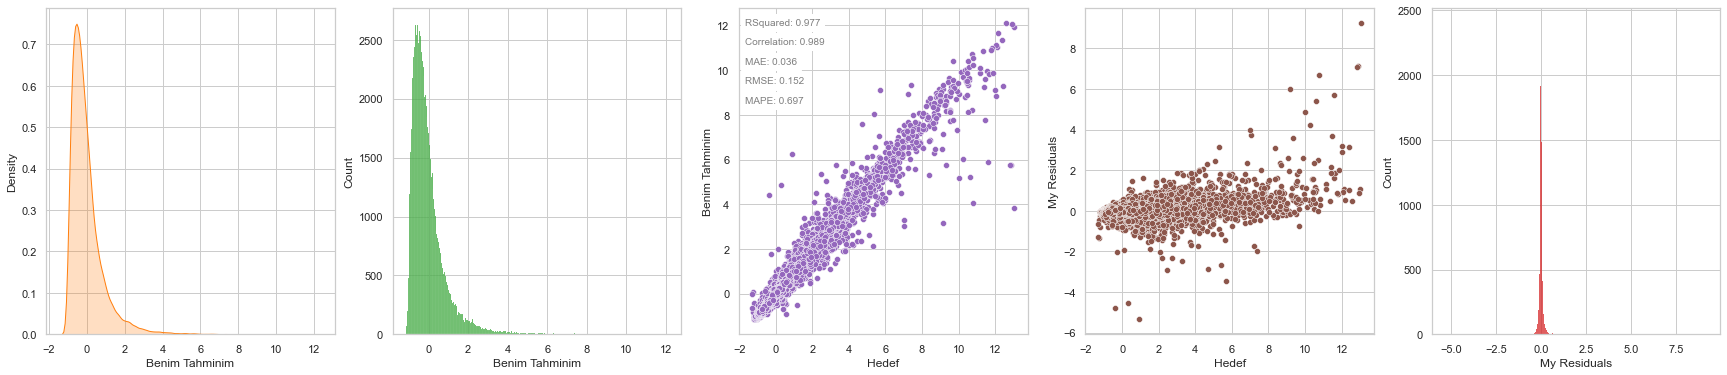

In [80]:
figsize_set =(30,6)
target_col = 'hedef'
data = preds_data.copy()
pred_col='benim_tahminim'
res_col = 'my_residuals'
i=1

fig, (ax0, ax1, ax2,ax3,ax4) = plt.subplots(ncols=5,figsize=figsize_set)

col_values = data.loc[:,[pred_col]]
ax2.text(x=0.02, y=0.97, transform=ax2.transAxes, s="RSquared: %.3f" % r2_score(data[target_col],data[pred_col]),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.91, transform=ax2.transAxes, s="Correlation: %.3f" % pearsonr(data[target_col],data[pred_col])[0],\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.85, transform=ax2.transAxes, s="MAE: %.3f" % median_absolute_error(data[target_col],data[pred_col]),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.79, transform=ax2.transAxes, s="RMSE: %.3f" % math.sqrt(mean_squared_error(data[target_col],data[pred_col])),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.73, transform=ax2.transAxes, s="MAPE: %.3f" % mean_absolute_percentage_error(data[target_col],data[pred_col]) ,\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')

ax0.set(xlabel='Benim Tahminim')
ax1.set(xlabel='Benim Tahminim')
ax2.set(xlabel='Hedef', ylabel='Benim Tahminim')
ax3.set(xlabel='Hedef', ylabel='My Residuals')
ax4.set(xlabel='My Residuals')

sns.kdeplot(x=pred_col, data=data,color=colors[i], ax=ax0,shade=True)
sns.histplot(x=pred_col, data=data,color=colors[i+1], ax=ax1)
sns.scatterplot(x=target_col,y=pred_col,data=data,color=colors[i+3], ax=ax2)
sns.scatterplot(x=target_col,y=res_col,data=data,color=colors[i+4], ax=ax3)
sns.histplot(x=res_col, data=data,color=colors[i+2], ax=ax4)
plt.show()

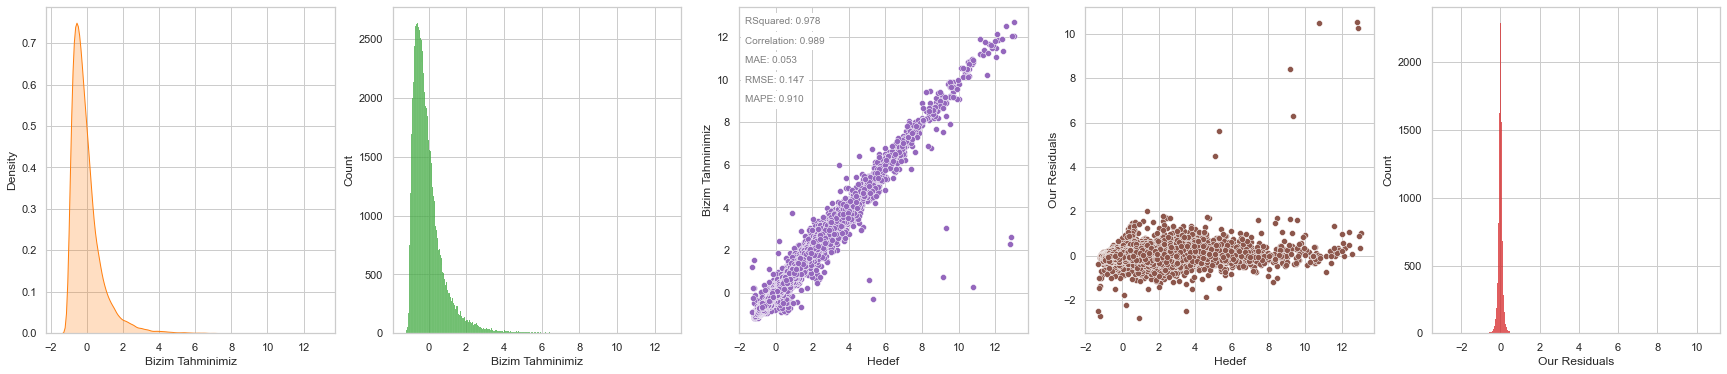

In [81]:
figsize_set =(30,6)
target_col = 'hedef'
data = preds_data.copy()
pred_col='bizim_tahminimiz'
res_col = 'our_residuals'

fig, (ax0, ax1, ax2,ax3,ax4) = plt.subplots(ncols=5,figsize=figsize_set)

col_values = data.loc[:,[pred_col]]
ax2.text(x=0.02, y=0.97, transform=ax2.transAxes, s="RSquared: %.3f" % r2_score(data[target_col],data[pred_col]),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.91, transform=ax2.transAxes, s="Correlation: %.3f" % pearsonr(data[target_col],data[pred_col])[0],\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.85, transform=ax2.transAxes, s="MAE: %.3f" % median_absolute_error(data[target_col],data[pred_col]),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.79, transform=ax2.transAxes, s="RMSE: %.3f" % math.sqrt(mean_squared_error(data[target_col],data[pred_col])),\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')
ax2.text(x=0.02, y=0.73, transform=ax2.transAxes, s="MAPE: %.3f" % mean_absolute_percentage_error(data[target_col],data[pred_col]) ,\
    fontweight='light', fontsize=10, verticalalignment='top', horizontalalignment='left',\
    backgroundcolor='white', color='grey')

ax0.set(xlabel='Bizim Tahminimiz')
ax1.set(xlabel='Bizim Tahminimiz')
ax2.set(xlabel='Hedef', ylabel='Bizim Tahminimiz')
ax3.set(xlabel='Hedef', ylabel='Our Residuals')
ax4.set(xlabel='Our Residuals')

sns.kdeplot(x=pred_col, data=data,color=colors[i], ax=ax0,shade=True)
sns.histplot(x=pred_col, data=data,color=colors[i+1], ax=ax1)
sns.scatterplot(x=target_col,y=pred_col,data=data,color=colors[i+3], ax=ax2)
sns.scatterplot(x=target_col,y=res_col,data=data,color=colors[i+4], ax=ax3)
sns.histplot(x=res_col, data=data,color=colors[i+2], ax=ax4)
plt.show()